In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pubmed_df = pandas.read_table('data/pubmed-since-2014-filtered.tsv.gz', compression='gzip', parse_dates=['epub_date'])
len(pubmed_df)

657828

In [3]:
pubmed_df.head()

,pubmed_id,doi,pubtype,journal,journal_abbrev,epub_date,acceptance_days,publication_days
0,26111384,10.7554/eLife.07072,Journal Article,eLife,Elife,2015-06-25,111,17
1,26111374,10.1371/journal.pcbi.1004310,Journal Article,PLoS computational biology,PLoS Comput Biol,2015-06-25,163,56
2,26111373,10.1111/wrr.12333,Journal Article,Wound repair and regeneration : official publi...,Wound Repair Regen,2015-06-24,97,7
3,26111363,10.1002/ppul.23226,Journal Article,Pediatric pulmonology,Pediatr Pulmonol,2015-06-25,159,32
4,26111358,10.1111/jgh.13026,Journal Article,Journal of gastroenterology and hepatology,J Gastroenterol Hepatol,2015-06-25,151,16


In [4]:
summary_df = pandas.read_table('data/pubmed-since-2014-summary.tsv')

In [5]:
journals = {
    'PeerJ',
    'Nucleic Acids Res',
    'BMC Genomics',
    'BMC Bioinformatics',
    'Elife',
    'Mol Syst Biol',
    'Genome Biol',
    'Genome Med',
    'Nat Commun',
    'PLoS Comput Biol',
    'PLoS One',
    'PLoS Biol',
    'PLoS Genet',
    'PLoS Med',
    'Database (Oxford)',
    'J Cheminform',
}


In [81]:
seaborn.set(style='whitegrid')
seaborn.set_style({'figure.figsize': (6, 3.2)})

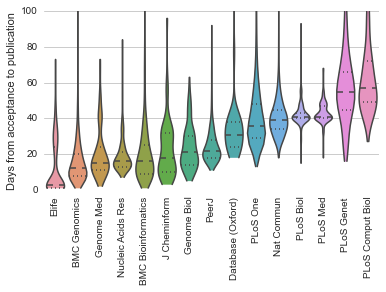

In [82]:
# Days from acceptance to publication
select_df = pubmed_df[pubmed_df.journal_abbrev.isin(journals)]
order = summary_df[summary_df.journal_abbrev.isin(journals)].sort(['publication_days_median']).journal_abbrev
g = seaborn.violinplot(select_df.publication_days, select_df.journal_abbrev,
                       bw=0.3, order = order, cut=0, size=3, aspect=1);
plt.ylim((0,100));
plt.xticks(rotation=90);
plt.xlabel('')
plt.ylabel('Days from acceptance to publication')
seaborn.despine(left=True, bottom=True)
plt.savefig('figure/publication-days-violinplot.pdf', bbox_inches='tight', pad_inches=0.03)
plt.savefig('figure/publication-days-violinplot.png', dpi=300, bbox_inches='tight', pad_inches=0.03)

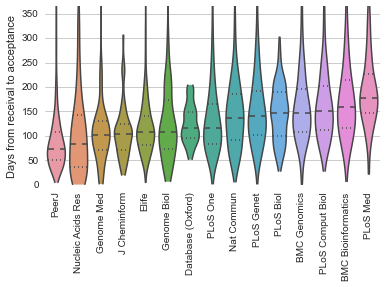

In [83]:
# Days from receival to acceptance
select_df = pubmed_df[pubmed_df.journal_abbrev.isin(journals)]
order = summary_df[summary_df.journal_abbrev.isin(journals)].sort(['acceptance_days_median']).journal_abbrev
g = seaborn.violinplot(select_df.acceptance_days, select_df.journal_abbrev, bw=0.3, order = order, cut=0);
plt.ylim((0,365));
plt.xticks(rotation=90);
plt.xlabel('')
plt.ylabel('Days from receival to acceptance')
seaborn.despine(left=True, bottom=True)
plt.savefig('figure/acceptance-days-violinplot.pdf', bbox_inches='tight', pad_inches=0.03)
plt.savefig('figure/acceptance-days-violinplot.png', dpi=300, bbox_inches='tight', pad_inches=0.03)